# Real Estate Price Prediction Model Summary

## Overview:
The Real Estate Price Prediction model employs three different regression algorithms—Linear Regression, Random Forest, and Gradient Boosting—to forecast property prices. The model is trained using a comprehensive dataset "kc_house_data.csv" containing attributes like bedrooms, bathrooms, square footage, and location details.

## Model Performance:
The Linear Regression model exhibits a test score of 69.95%, the Random Forest model achieves a test score of 85.70%, and the Gradient Boosting model showcases the highest test score of 87.77%. This demonstrates that the Gradient Boosting model outperforms the other two models in predicting home prices.

## Mean Squared Error (MSE):
For the Linear Regression model, the MSE is 43,387,526,779.35. The Random Forest model yields an MSE of 20,647,785,064.98, while the Gradient Boosting model achieves the lowest MSE of 17,649,013,523.66. A lower MSE indicates more accurate predictions.

## Model Comparison Visualization:
The bar chart below provides a visual representation of the training and testing scores for each model. The Gradient Boosting model shows the highest testing score, reinforcing its predictive superiority. Additionally, the Mean Squared Error bar chart highlights the Gradient Boosting model's advantage in producing more accurate predictions compared to the other models.

![Training and Testing Scores](Train%20and%20Test%20Score.png)

## Feature Importance:
The Gradient Boosting model's feature importance chart illustrates the significance of different features in predicting home prices. Notably, features like square footage and number of bedrooms hold higher importance in influencing price predictions.

![Feature Importance](Feature%20Importance.png)

In summary, the Gradient Boosting model stands out as the most accurate predictor of real estate prices among the three algorithms considered. It achieves the highest testing score and the lowest Mean Squared Error, making it the preferred choice for this price prediction task.

### Import Required Packages 

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
%matplotlib inline

### Load the dataset

In [2]:
data=pd.read_csv("kc_house_data.csv")

### Display basic information about the dataset

In [3]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [5]:
data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [6]:
data.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [7]:
data.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

### Create a copy of the dataset

In [9]:
data_copy=data.copy()

### Extract target variable (y) and features (x)

In [11]:
y = data['price']
conv_dates = [1 if values == 2014 else 0 for values in data.date ]
data['date'] = conv_dates
x = data.drop(['id', 'price'],axis=1)

### Split the dataset into training and testing sets

In [12]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

### Define models to be evaluated

In [31]:
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=400, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=400, max_depth=5, min_samples_split=2,
                                                   learning_rate=0.1, loss='squared_error')
}

### Initialize dictionary to store results


In [33]:
results = {}

### Loop through each model and evaluate its performance


In [34]:
for model_name, model in models.items():
    model.fit(x_train, y_train)
    train_score = model.score(x_train, y_train)
    test_score = model.score(x_test, y_test)
    y_pred = model.predict(x_test)
    mse = mean_squared_error(y_test, y_pred)
    results[model_name] = {'Train Score': train_score, 'Test Score': test_score, 'MSE': mse}


### Display results for each model


In [35]:
for model_name, scores in results.items():
    print(f"Model: {model_name}")
    print(f"Train Score: {scores['Train Score']:.4f}")
    print(f"Test Score: {scores['Test Score']:.4f}")
    print(f"MSE: {scores['MSE']:.2f}\n")

Model: Linear Regression
Train Score: 0.6995
Test Score: 0.6995
MSE: 43387526779.35

Model: Random Forest
Train Score: 0.9830
Test Score: 0.8570
MSE: 20647785064.98

Model: Gradient Boosting
Train Score: 0.9741
Test Score: 0.8777
MSE: 17649013523.66



### Create a DataFrame to visualize results


In [36]:
results_df = pd.DataFrame.from_dict(results, orient='index')

### Plot training and testing scores, as well as Mean Squared Error


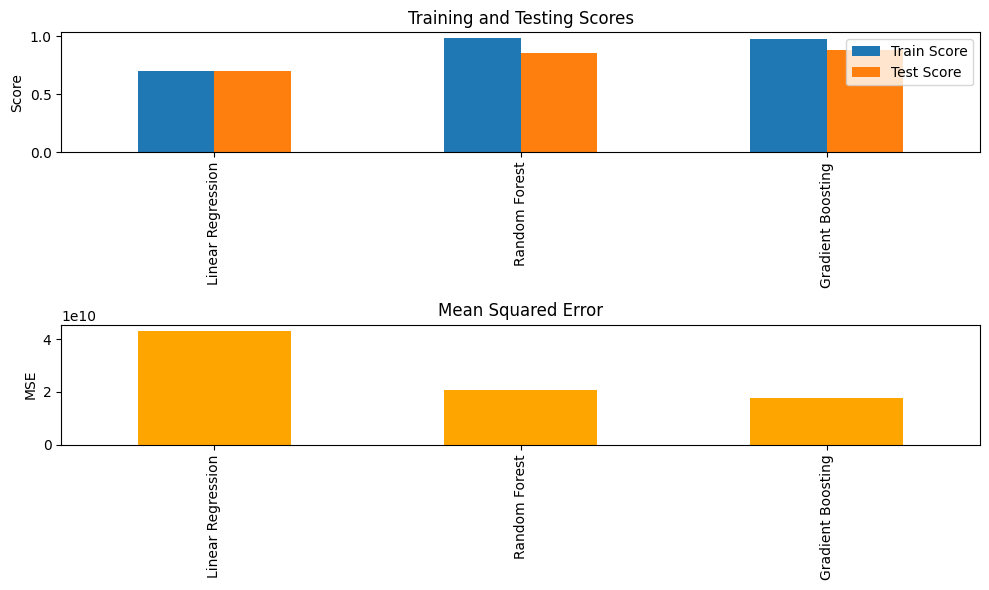

In [37]:
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
results_df[['Train Score', 'Test Score']].plot(kind='bar', ax=plt.gca())
plt.title('Training and Testing Scores')
plt.ylabel('Score')

plt.subplot(2, 1, 2)
results_df['MSE'].plot(kind='bar', color='orange', ax=plt.gca())
plt.title('Mean Squared Error')
plt.ylabel('MSE')

plt.tight_layout()
plt.show()

### Calculate mean squared error for each stage of Gradient Boosting


In [38]:
t_sc = np.zeros((clf.n_estimators),dtype=np.float64)
for i,y_pred in enumerate(clf.staged_predict(x_test)):
        t_sc[i] = mean_squared_error(y_test, y_pred) 

### Create an array of test scores


In [40]:
testsc = np.arange((clf.n_estimators))+1

### Plot the training and testing scores for Gradient Boosting

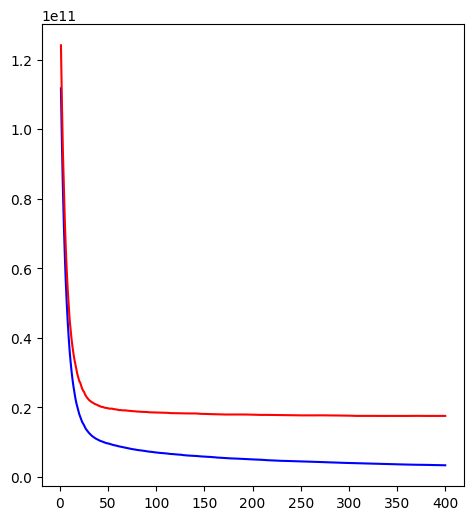

In [41]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(testsc,clf.train_score_,'b-',label= 'Set dev train')
plt.plot(testsc,t_sc,'r-',label = 'set dev test')

### Plot feature importance for Gradient Boosting

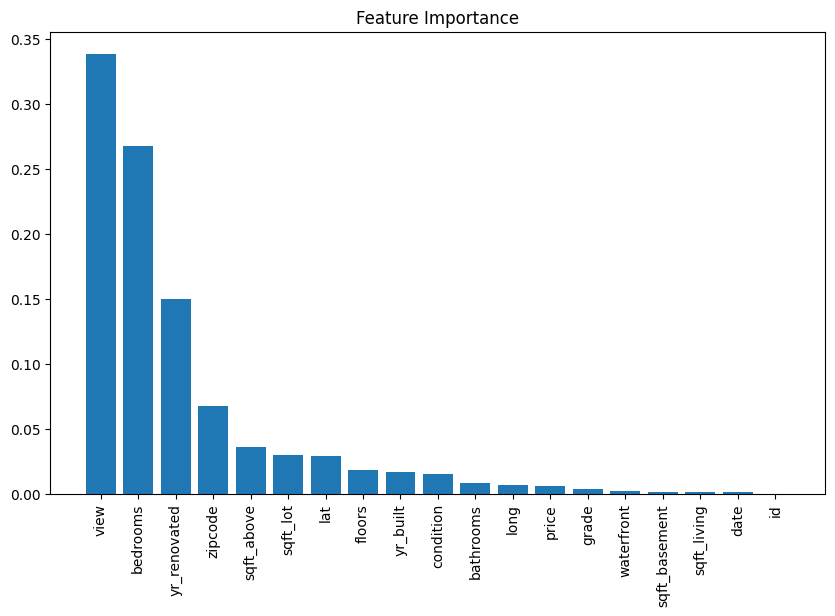

In [29]:
feature_importances = clf.feature_importances_
sorted_idx = np.argsort(feature_importances)[::-1]

plt.figure(figsize=(10, 6))
plt.bar(range(x_train.shape[1]), feature_importances[sorted_idx])
plt.xticks(range(x_train.shape[1]), np.array(data.columns)[sorted_idx], rotation=90)
plt.title("Feature Importance")
plt.show()